Godbless Chille
Day 5: Application of Neural Networks on Sarcasm Detection

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten
from tensorflow.keras.callbacks import EarlyStopping
%matplotlib inline
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset_v2.json
/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset.json


In [2]:
df=pd.read_json('/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset_v2.json',lines=True)
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


In [3]:
df.shape

(28619, 3)

In [13]:
df

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...
28616,0,the most beautiful acceptance speech this week...,https://www.huffingtonpost.com/entry/andrew-ah...
28617,1,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...


So far, we have imported all the necessary libraries that will help us to visualize, analyze, pre-process as well as train the data we are taking in. We have also read the json file containing the data that we need to use. 

In [6]:
df['is_sarcastic'].value_counts()

0    14985
1    13634
Name: is_sarcastic, dtype: int64

In [7]:
df['headline'].value_counts()

'no way to prevent this,' says only nation where this regularly happens    12
sunday roundup                                                             10
the 20 funniest tweets from women this week                                10
the funniest tweets from parents this week                                  6
the funniest tweets from women this week                                    4
                                                                           ..
nigeria's vote could mark turning point in country's history                1
sales of ivanka trump products surged last month                            1
'quantico' star's ode to fried chicken will brighten your day               1
study: majority of americans not informed enough to stereotype chechens     1
magazine editor undergoes sleek new redesign                                1
Name: headline, Length: 28503, dtype: int64

In [8]:
df['article_link'].value_counts()

https://politics.theonion.com/nation-not-sure-how-many-ex-trump-staffers-it-can-safel-1823468346             2
https://www.huffingtonpost.comhttp://nymag.com/daily/intelligencer/2016/05/hillary-clinton-candidacy.html    2
https://www.theonion.com/alumni-furious-over-high-schools-constant-improvements-1819570000                   1
https://www.huffingtonpost.com/entry/electric-car-sales-1-million-2020_us_56a23c26e4b0404eb8f1350e           1
https://www.theonion.com/just-illegalize-us-already-nations-assault-weapons-beg-1819591021                   1
                                                                                                            ..
https://www.huffingtonpost.com/entry/biggest-celebrity-fails-of-2015_us_568426b3e4b06fa68881be6e             1
https://entertainment.theonion.com/christopher-plummer-probably-nailing-it-in-king-lear-so-1819590417        1
https://www.huffingtonpost.com/entry/donald-trump-veterans-hotline_us_5783f248e4b01edea78f08c9               1
h

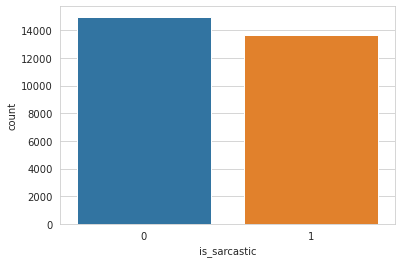

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='is_sarcastic',data=df);

We do a test-train split: we divide the data to data to be used for training and data to be used for testing the model

In [15]:
X=df['headline'].values
y=df['is_sarcastic'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Tokenization and padding

In [11]:
vocab_size = 10000
oov_tok = '<00V>'
max_length = 120
padding_type = 'post'
trunc_type = 'post'
embedding_dim = 16
num_epochs = 10


In [12]:
tokenizer= Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index=tokenizer.word_index
training_sequences=tokenizer.texts_to_sequences(X_train)
training_padded=pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
testing_sequences=tokenizer.texts_to_sequences(X_test)
testing_padded=pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

Let's see the Xtrains and Ytrains

In [20]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(22895,) (5724,) (22895,) (5724,)


Building a sequential model

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(training_padded, 
                    y_train, 
                    validation_data=(testing_padded, y_test), 
                    epochs=30, 
                    verbose=2)

Epoch 1/30
716/716 - 3s - loss: 0.6534 - accuracy: 0.6301 - val_loss: 0.5280 - val_accuracy: 0.7963
Epoch 2/30
716/716 - 2s - loss: 0.4115 - accuracy: 0.8357 - val_loss: 0.3898 - val_accuracy: 0.8234
Epoch 3/30
716/716 - 2s - loss: 0.3132 - accuracy: 0.8732 - val_loss: 0.3484 - val_accuracy: 0.8454
Epoch 4/30
716/716 - 2s - loss: 0.2663 - accuracy: 0.8936 - val_loss: 0.3378 - val_accuracy: 0.8492
Epoch 5/30
716/716 - 2s - loss: 0.2329 - accuracy: 0.9080 - val_loss: 0.3469 - val_accuracy: 0.8492
Epoch 6/30
716/716 - 2s - loss: 0.2087 - accuracy: 0.9199 - val_loss: 0.3526 - val_accuracy: 0.8485
Epoch 7/30
716/716 - 2s - loss: 0.1868 - accuracy: 0.9295 - val_loss: 0.3505 - val_accuracy: 0.8492
Epoch 8/30
716/716 - 2s - loss: 0.1700 - accuracy: 0.9358 - val_loss: 0.3860 - val_accuracy: 0.8386
Epoch 9/30
716/716 - 2s - loss: 0.1571 - accuracy: 0.9411 - val_loss: 0.3758 - val_accuracy: 0.8461
Epoch 10/30
716/716 - 2s - loss: 0.1440 - accuracy: 0.9487 - val_loss: 0.3935 - val_accuracy: 0.8436

Visualiza model accuracy and loss

In [25]:
def plot_acc(model,epochsnum):
    df_m=pd.DataFrame(model.history.history)
    df_m['Epoch']=range(1,epochsnum+1)
    df_m.index=df_m['Epoch']
    score = model.evaluate(testing_padded, y_test, batch_size=64, verbose=1)
    print('Test accuracy:', score[1])
    plt.plot(df_m['loss'])
    plt.plot(df_m['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'val_loss'])
    plt.show()

90/90 [==============================] - 0s 1ms/step - loss: 0.9264 - accuracy: 0.8150
Test accuracy: 0.8149895071983337


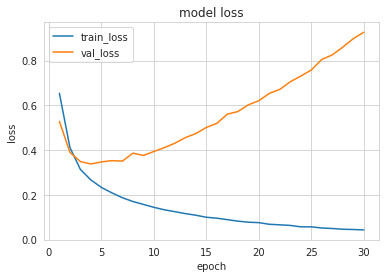

In [26]:
plot_acc(model=model,epochsnum=30)

**Flatten the model**

In [27]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model2.summary()
# train model
history= model2.fit(training_padded, 
                    y_train, 
                    validation_data=(testing_padded, y_test), 
                    epochs=10, 
                    verbose=2)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                46104     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 206,129
Trainable params: 206,129
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
716/716 - 2s - loss: 0.4244 - accuracy: 0.7921 - val_loss: 0.3052 - val_accuracy: 0.8683
Epoch 2/10
716/716 - 2s - loss: 0.1998 - accuracy: 0.9197 - val_loss: 0.3105 - val_accuracy: 0.8672
Epoch 3/10
716/716 - 2s - loss: 0.1093 - accur

90/90 [==============================] - 0s 1ms/step - loss: 0.7882 - accuracy: 0.8510
Test accuracy: 0.8509783148765564


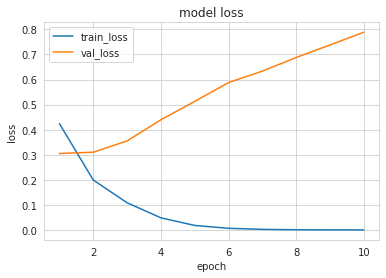

In [29]:
plot_acc(model=model2,epochsnum=10)

**LSTM**

In [30]:
model_lstm = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_lstm.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                12544     
_________________________________________________________________
dense_4 (Dense)              (None, 24)                1560      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 174,129
Trainable params: 174,129
Non-trainable params: 0
_________________________________________________________________


In [31]:
history = model_lstm.fit(training_padded, 
                    y_train, 
                    validation_data=(testing_padded, y_test), 
                    epochs=10, 
                    verbose=2)

Epoch 1/10
716/716 - 44s - loss: 0.4060 - accuracy: 0.8025 - val_loss: 0.3180 - val_accuracy: 0.8613
Epoch 2/10
716/716 - 42s - loss: 0.2186 - accuracy: 0.9104 - val_loss: 0.3245 - val_accuracy: 0.8615
Epoch 3/10
716/716 - 41s - loss: 0.1438 - accuracy: 0.9442 - val_loss: 0.3736 - val_accuracy: 0.8538
Epoch 4/10
716/716 - 41s - loss: 0.0930 - accuracy: 0.9665 - val_loss: 0.4729 - val_accuracy: 0.8470
Epoch 5/10
716/716 - 42s - loss: 0.0635 - accuracy: 0.9788 - val_loss: 0.5266 - val_accuracy: 0.8494
Epoch 6/10
716/716 - 44s - loss: 0.0410 - accuracy: 0.9868 - val_loss: 0.6474 - val_accuracy: 0.8438
Epoch 7/10
716/716 - 42s - loss: 0.0297 - accuracy: 0.9912 - val_loss: 0.7595 - val_accuracy: 0.8405
Epoch 8/10
716/716 - 42s - loss: 0.0215 - accuracy: 0.9934 - val_loss: 0.8357 - val_accuracy: 0.8354
Epoch 9/10
716/716 - 42s - loss: 0.0178 - accuracy: 0.9939 - val_loss: 0.8904 - val_accuracy: 0.8370
Epoch 10/10
716/716 - 42s - loss: 0.0147 - accuracy: 0.9955 - val_loss: 0.9953 - val_accura

90/90 [==============================] - 2s 20ms/step - loss: 0.9953 - accuracy: 0.8248
Test accuracy: 0.8247728943824768


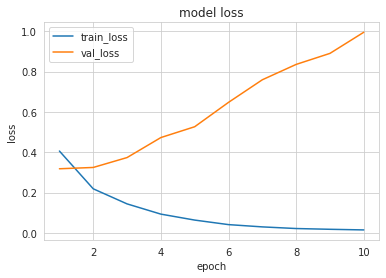

In [32]:
plot_acc(model=model_lstm,epochsnum=10)

I am looking to understand this more since I have only used code to watch how these functions work, and not actually implemented everything myself